## IMPORTING LIBRARIES¶


In [111]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import loss, accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## LOADING DATA¶


In [114]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [118]:
df.shape

(145460, 23)

In [120]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Ther are missing values in the data set 
# data set include numeric and catagorical values 

# DATA VISUALIZATION AND CLEANING


## Plot the distribution without dropping missing values from the DataFrame on minTem column


Missing values in MinTemp: 1485


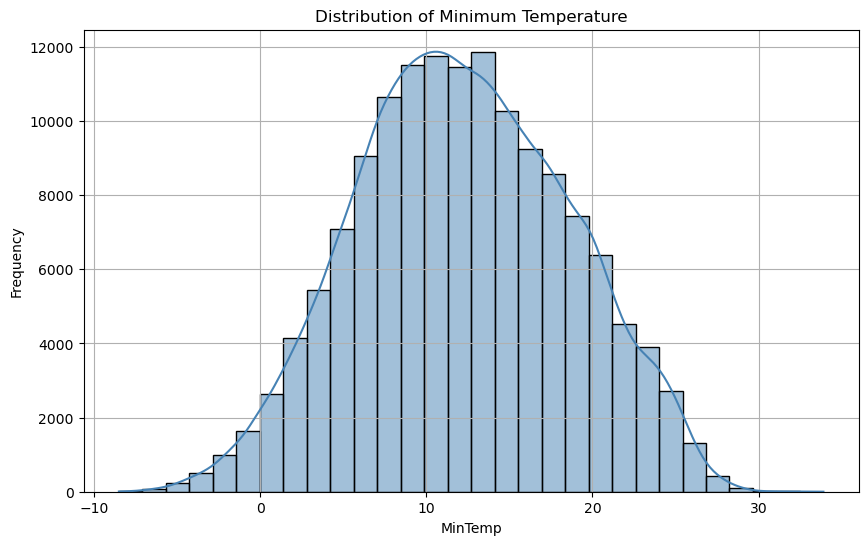

In [125]:
# Check missing value count
missing_count = df['MinTemp'].isnull().sum()
print(f"Missing values in MinTemp: {missing_count}")

# Plot the distribution without dropping missing values from the DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df['MinTemp'].dropna(), kde=True, bins=30, color='steelblue')
plt.title('Distribution of Minimum Temperature')
plt.xlabel('MinTemp')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [126]:
# Calculate the mean (excluding NaNs)
min_temp_mean = df['MinTemp'].mean()

# Fill missing values with the mean
df['MinTemp'].fillna(min_temp_mean, inplace=True)

print("Missing values in MinTemp after imputation:", df['MinTemp'].isnull().sum())


Missing values in MinTemp after imputation: 0


C:\Users\User\AppData\Local\Temp\ipykernel_6664\3396725037.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(min_temp_mean, inplace=True)


## MaxTemp column graph for data distribution 

Missing values in MaxTemp: 1261


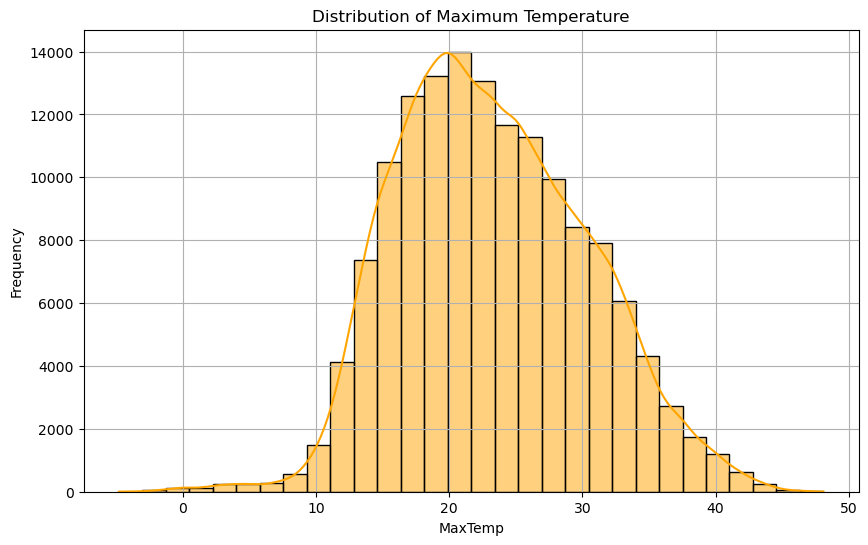

In [130]:
# Check missing value count
missing_count = df['MaxTemp'].isnull().sum()
print(f"Missing values in MaxTemp: {missing_count}")

# Plot the distribution without dropping missing values from the DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(df['MaxTemp'].dropna(), kde=True, bins=30, color='orange')
plt.title('Distribution of Maximum Temperature')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [131]:
# Calculate the mean of MaxTemp (ignoring NaNs)
max_temp_mean = df['MaxTemp'].mean()

# Fill missing values with the mean
df['MaxTemp'].fillna(max_temp_mean, inplace=True)

print("Missing values in MaxTemp after imputation:", df['MaxTemp'].isnull().sum())

Missing values in MaxTemp after imputation: 0


C:\Users\User\AppData\Local\Temp\ipykernel_6664\3724298548.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MaxTemp'].fillna(max_temp_mean, inplace=True)


## create a function for fill all missing values present in my data set 
### => Fill numeric data with mean function 
### => Fill catagorical data with most repetative values 

In [135]:
import pandas as pd

# Load your dataset
df = pd.read_csv('weatherAus.csv')

# Updated list of all columns with missing values, including MinTemp and MaxTemp
all_missing_cols = [
    'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
    'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
    'MinTemp', 'MaxTemp'
]

# Function to fill missing values appropriately for both numeric and categorical data
def fill_missing_values(df, columns):
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:  # Numeric columns
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            print(f"[Numeric] Filled missing in '{col}' with mean: {mean_val:.2f}")
        else:  # Categorical columns
            mode_val = df[col].mode().iloc[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"[Categorical] Filled missing in '{col}' with mode: '{mode_val}'")
    return df

# Apply the function
df = fill_missing_values(df, all_missing_cols)

# Optional: Check if any missing values remain in the selected columns
print("\nRemaining missing values:")
print(df[all_missing_cols].isnull().sum())


[Numeric] Filled missing in 'Rainfall' with mean: 2.36
[Numeric] Filled missing in 'Evaporation' with mean: 5.47
[Numeric] Filled missing in 'Sunshine' with mean: 7.61
[Categorical] Filled missing in 'WindGustDir' with mode: 'W'
[Numeric] Filled missing in 'WindGustSpeed' with mean: 40.04
[Categorical] Filled missing in 'WindDir9am' with mode: 'N'
[Categorical] Filled missing in 'WindDir3pm' with mode: 'SE'
[Numeric] Filled missing in 'WindSpeed9am' with mean: 14.04
[Numeric] Filled missing in 'WindSpeed3pm' with mean: 18.66
[Numeric] Filled missing in 'Humidity9am' with mean: 68.88
[Numeric] Filled missing in 'Humidity3pm' with mean: 51.54
[Numeric] Filled missing in 'Pressure9am' with mean: 1017.65
[Numeric] Filled missing in 'Pressure3pm' with mean: 1015.26
[Numeric] Filled missing in 'Cloud9am' with mean: 4.45
[Numeric] Filled missing in 'Cloud3pm' with mean: 4.51
[Numeric] Filled missing in 'Temp9am' with mean: 16.99
[Numeric] Filled missing in 'Temp3pm' with mean: 21.68
[Categori

C:\Users\User\AppData\Local\Temp\ipykernel_6664\2918385077.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6664\2918385077.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [136]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [139]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Columns for Label Encoding:
## From the columns we’ve worked with so far, the categorical columns that should be label-encoded include:

### WindGustDir

### WindDir9am

### WindDir3pm

### RainToday

### RainTomorrow

In [142]:
# List of categorical columns to be label encoded
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow',"Location"]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string before encoding if necessary
    print(f"Label Encoding applied on '{col}'")

# Check the encoded values
print("\nSample of the dataset after Label Encoding:")
print(df[categorical_cols].head())

Label Encoding applied on 'WindGustDir'
Label Encoding applied on 'WindDir9am'
Label Encoding applied on 'WindDir3pm'
Label Encoding applied on 'RainToday'
Label Encoding applied on 'RainTomorrow'
Label Encoding applied on 'Location'

Sample of the dataset after Label Encoding:
   WindGustDir  WindDir9am  WindDir3pm  RainToday  RainTomorrow  Location
0           13          13          14          0             0         2
1           14           6          15          0             0         2
2           15          13          15          0             0         2
3            4           9           0          0             0         2
4           13           1           7          0             0         2


In [144]:
df.drop("Date", axis='columns', inplace=True)

## MODEL TRAINING

In [147]:
X = df.drop(columns=["RainTomorrow"])
Y = df["RainTomorrow"]

## ## SPLITTING DATA

In [150]:
X_train ,X_test,Y_train, Y_test = train_test_split(X , Y , test_size = 0.2 , random_state=42)

## FEATURE SCALING

In [153]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [162]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8195 - loss: 0.4078 - val_accuracy: 0.8454 - val_loss: 0.3605
Epoch 2/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8463 - loss: 0.3618 - val_accuracy: 0.8469 - val_loss: 0.3565
Epoch 3/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8482 - loss: 0.3575 - val_accuracy: 0.8478 - val_loss: 0.3547
Epoch 4/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8489 - loss: 0.3528 - val_accuracy: 0.8477 - val_loss: 0.3531
Epoch 5/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8492 - loss: 0.3526 - val_accuracy: 0.8487 - val_loss: 0.3511
Epoch 6/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8487 - loss: 0.3528 - val_accuracy: 0.8493 - val_loss: 0.3501
Epoch 7/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8502 - loss: 0.3500 - val_accuracy: 0.8487 - val_loss: 0.3497
Epoch 8/50
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8503 - loss: 0.3504 -

In [164]:
loss , accuracy = model.evaluate(X_test , Y_test)

910/910 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8478 - loss: 0.3430  


In [166]:
loss , accuracy

(0.3418624699115753, 0.8501993417739868)